In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import eig

In [2]:
Marks=np.array([[3,4],[2,8],[6,9]])
print(Marks)

[[3 4]
 [2 8]
 [6 9]]


In [3]:
Marks_df=pd.DataFrame(Marks,columns=['Physics','Maths'])
Marks_df

,Physics,Maths
0,3,4
1,2,8
2,6,9


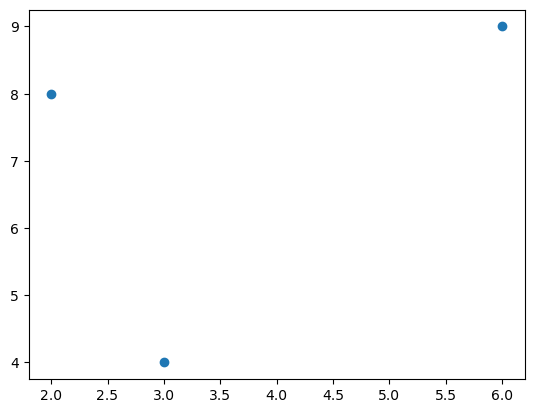

In [4]:
plt.scatter(Marks_df['Physics'],Marks_df['Maths'])

In [5]:
#making data mean centric
meanbycolomn=np.mean(Marks.T,axis=1) # T-transpose
print(meanbycolomn)
Scaled_data=Marks - meanbycolomn

[3.66666667 7.        ]


In [6]:
Marks.T

array([[3, 2, 6],
       [4, 8, 9]])

In [7]:
Scaled_data

array([[-0.66666667, -3.        ],
       [-1.66666667,  1.        ],
       [ 2.33333333,  2.        ]])

In [8]:
# find out the covariance of scaled data
Cov_mat=np.cov(Scaled_data.T)
Cov_mat

array([[4.33333333, 2.5       ],
       [2.5       , 7.        ]])

In [9]:
# find out eigen value and eigen vector of above covariance matrics
Eval,Evec=eig(Cov_mat)
print(Eval)
print(Evec)

[2.83333333 8.5       ]
[[-0.85749293 -0.51449576]
 [ 0.51449576 -0.85749293]]


In [11]:
#get original data projected to PCA as new axis
projected_data=Evec.T.dot(Scaled_data.T)
print(projected_data.T)

[[-9.71825316e-01  2.91547595e+00]
 [ 1.94365063e+00  1.11022302e-16]
 [-9.71825316e-01 -2.91547595e+00]]


In [12]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit_transform(Marks)

array([[ 2.91547595e+00, -9.71825316e-01],
       [-6.86635020e-16,  1.94365063e+00],
       [-2.91547595e+00, -9.71825316e-01]])

In [13]:
pca.explained_variance_ratio_ # variance explaination ratio by each PCA

array([0.75, 0.25])

In [15]:
PDF=pd.DataFrame(data=pca.fit_transform(Marks),columns=['PC1',"PC2"])

In [16]:
PDF

,PC1,PC2
0,2.915476e+00,-0.971825
1,-6.866350e-16,1.943651
2,-2.915476e+00,-0.971825


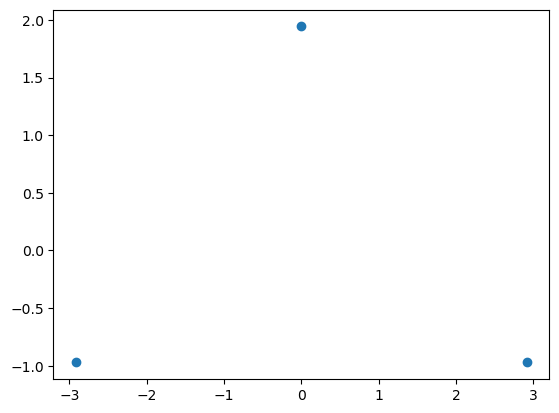

In [17]:
plt.scatter(PDF['PC1'],PDF['PC2'])

In [18]:
# inverse transform
pca.inverse_transform(pca.fit_transform(Marks))

array([[3., 4.],
       [2., 8.],
       [6., 9.]])

In [21]:
# how much weight each variable has in PCA
loading=pd.DataFrame(pca.components_.T,columns=['PC1','PC2'],index=['Physics','Maths'])
loading

,PC1,PC2
Physics,-0.514496,-0.857493
Maths,-0.857493,0.514496
